# import and reading

In [1]:
# !pip install catboost

In [2]:
# !pip install shap

In [3]:
# !pip install optuna

In [4]:
# !unzip spaceship-titanic.zip

In [5]:
import pandas as pd
import numpy as np
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import shap
import optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [8]:
X_test = pd.read_csv('test.csv')
ids = X_test['PassengerId']

# changing

### check fetures

Рассмотрим кол-во значений в каждой фиче

In [9]:
for i in df.columns.values:
  print(df[i].unique().shape)
  display(df[i].value_counts(dropna=False)[:30])

(8693,)


,count
PassengerId,
0001_01,1
6136_01,1
6141_01,1
6139_06,1
6139_05,1
6139_04,1
6139_03,1
6139_02,1
6139_01,1


(4,)


,count
HomePlanet,
Earth,4602
Europa,2131
Mars,1759
NaN,201


(3,)


,count
CryoSleep,
False,5439
True,3037
NaN,217


(6561,)


,count
Cabin,
NaN,199
G/734/S,8
C/137/S,7
B/201/P,7
G/109/P,7
G/981/S,7
D/176/S,7
F/1411/P,7
C/21/P,7


(4,)


,count
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796
NaN,182


(81,)


<ipython-input-9-2288673615e8>:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  display(df[i].value_counts(dropna=False)[:30])


,count
Age,
24.0,324
18.0,320
21.0,311
19.0,293
23.0,292
22.0,291
20.0,277
26.0,268
28.0,267


(3,)


,count
VIP,
False,8291
NaN,203
True,199


(1274,)


<ipython-input-9-2288673615e8>:3: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  display(df[i].value_counts(dropna=False)[:30])


,count
RoomService,
0.0,5577
NaN,181
1.0,117
2.0,79
3.0,61
4.0,47
5.0,28
9.0,25
8.0,24


(1508,)


,count
FoodCourt,
0.0,5456
NaN,183
1.0,116
2.0,75
3.0,53
4.0,53
5.0,33
6.0,31
9.0,28


(1116,)


,count
ShoppingMall,
0.0,5587
NaN,208
1.0,153
2.0,80
3.0,59
4.0,45
5.0,38
7.0,36
6.0,34


(1328,)


,count
Spa,
0.0,5324
NaN,183
1.0,146
2.0,105
3.0,53
5.0,53
4.0,46
7.0,34
6.0,33


(1307,)


,count
VRDeck,
0.0,5495
NaN,188
1.0,139
2.0,70
3.0,56
5.0,51
4.0,47
6.0,32
8.0,30


(8474,)


,count
Name,
NaN,200
Sus Coolez,2
Elaney Webstephrey,2
Dia Cartez,2
Grake Porki,2
Apix Wala,2
Sharie Gallenry,2
Cuses Pread,2
Alraium Disivering,2


(2,)


,count
Transported,
True,4378
False,4315


Пойдем по порядку:

1) Home planet - пока не кодируем (но будем)

2) CryoSleep - пока не кодируем

3) Cabin - имеет формат deck/num/side. Предлагается вытащить deck и side как категориальные фичи, также добавить фичу cabin_size по тому, как часто встречаются названия кают

4) Destination - пока не кодируем (но будем)

5) Age - оставляем (возможно разделим на отрезки)

6) VIP - пока не кодируем

7) RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - пока не кодируем, создадим фичу "all_sum", которая будет отражать кол-во потраченных денег

8) Name - пока не решили

9) ID - выделим группу

Начнем


In [10]:
df['deck'] = df['Cabin'].apply(lambda x: x[0] if x is not np.nan else np.nan)
df['side'] = df['Cabin'].apply(lambda x: x[-1] if x is not np.nan else np.nan)

X_test['deck'] = X_test['Cabin'].apply(lambda x: x[0] if x is not np.nan else np.nan)
X_test['side'] = X_test['Cabin'].apply(lambda x: x[-1] if x is not np.nan else np.nan)

In [11]:
df['deck'].value_counts(dropna=False)

,count
deck,
F,2794
G,2559
E,876
B,779
C,747
D,478
A,256
NaN,199
T,5


In [12]:
df['side'].value_counts(dropna=False)

,count
side,
S,4288
P,4206
NaN,199


In [13]:
replacer = df["Cabin"].value_counts(dropna=False).agg(dict)
replacer[np.nan] = np.nan
df['Cabin'].replace(replacer, inplace=True)

replacer = X_test["Cabin"].value_counts(dropna=False).agg(dict)
replacer[np.nan] = np.nan
X_test['Cabin'].replace(replacer, inplace=True)

In [14]:
df['Cabin'].value_counts(dropna=False)

,count
Cabin,
1.0,5427
2.0,1372
3.0,747
4.0,416
5.0,235
NaN,199
6.0,198
7.0,91
8.0,8


In [15]:
df['sum_all'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1, skipna=False)

X_test['sum_all'] = X_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1, skipna=False)

In [16]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,side,sum_all
0,0001_01,Europa,False,1.0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0.0
1,0002_01,Earth,False,1.0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,736.0
2,0003_01,Europa,False,2.0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,10383.0
3,0003_02,Europa,False,2.0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,5176.0
4,0004_01,Earth,False,1.0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,1.0,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P,8536.0
8689,9278_01,Earth,True,1.0,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S,0.0
8690,9279_01,Earth,False,1.0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S,1873.0
8691,9280_01,Europa,False,2.0,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S,4637.0


Имена все таки дропнем, они бессмыслены

In [17]:
df.drop('Name', axis=1, inplace=True)

X_test.drop('Name', axis=1, inplace=True)

In [18]:
for i in df.columns.values:
  print(df[i].unique().shape)
  display(df[i].value_counts(dropna=False).iloc[:30])

(8693,)


,count
PassengerId,
0001_01,1
6136_01,1
6141_01,1
6139_06,1
6139_05,1
6139_04,1
6139_03,1
6139_02,1
6139_01,1


(4,)


,count
HomePlanet,
Earth,4602
Europa,2131
Mars,1759
NaN,201


(3,)


,count
CryoSleep,
False,5439
True,3037
NaN,217


(9,)


,count
Cabin,
1.0,5427
2.0,1372
3.0,747
4.0,416
5.0,235
NaN,199
6.0,198
7.0,91
8.0,8


(4,)


,count
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796
NaN,182


(81,)


,count
Age,
24.0,324
18.0,320
21.0,311
19.0,293
23.0,292
22.0,291
20.0,277
26.0,268
28.0,267


(3,)


,count
VIP,
False,8291
NaN,203
True,199


(1274,)


,count
RoomService,
0.0,5577
NaN,181
1.0,117
2.0,79
3.0,61
4.0,47
5.0,28
9.0,25
8.0,24


(1508,)


,count
FoodCourt,
0.0,5456
NaN,183
1.0,116
2.0,75
3.0,53
4.0,53
5.0,33
6.0,31
9.0,28


(1116,)


,count
ShoppingMall,
0.0,5587
NaN,208
1.0,153
2.0,80
3.0,59
4.0,45
5.0,38
7.0,36
6.0,34


(1328,)


,count
Spa,
0.0,5324
NaN,183
1.0,146
2.0,105
3.0,53
5.0,53
4.0,46
7.0,34
6.0,33


(1307,)


,count
VRDeck,
0.0,5495
NaN,188
1.0,139
2.0,70
3.0,56
5.0,51
4.0,47
6.0,32
8.0,30


(2,)


,count
Transported,
True,4378
False,4315


(9,)


,count
deck,
F,2794
G,2559
E,876
B,779
C,747
D,478
A,256
NaN,199
T,5


(3,)


,count
side,
S,4288
P,4206
NaN,199


(2117,)


,count
sum_all,
0.0,3247
NaN,908
809.0,50
788.0,39
804.0,36
803.0,34
908.0,32
907.0,30
791.0,29


In [19]:
df['PassengerId'] = df['PassengerId'].apply(lambda x: x[:4])
X_test['PassengerId'] = X_test['PassengerId'].apply(lambda x: x[:4])

df['PassengerId'] = df['PassengerId'].astype(int)
X_test['PassengerId'] = X_test['PassengerId'].astype(int)

In [20]:
replacer = df['PassengerId'].value_counts().agg(dict)

df['PassengerId'] = df['PassengerId'].replace(replacer)
X_test['PassengerId'] = X_test['PassengerId'].replace(replacer)

### filling nans

Попробуем банальное запонение модой/медианой

In [21]:
df.dtypes

,0
PassengerId,int64
HomePlanet,object
CryoSleep,object
Cabin,float64
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


In [22]:
y_train = df['Transported']
df.drop('Transported', axis=1, inplace=True)

In [23]:
df[['CryoSleep', 'VIP']] = df[['CryoSleep', 'VIP']].apply(lambda x: x.astype(float))

cat = df.select_dtypes(include=['object']).columns
df[cat] = df[cat].apply(lambda x: x.astype(str))
X_test[cat] = X_test[cat].apply(lambda x: x.astype(str))

df[cat] = df[cat].fillna(df[cat].mode().squeeze(axis=0))
X_test[cat] = X_test[cat].fillna(X_test[cat].mode().squeeze(axis=0))

In [24]:
df.isna().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,217
Cabin,199
Destination,0
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [25]:
nums = df.select_dtypes(include=np.number).columns
df[nums] = df[nums].fillna(df[nums].median())
X_test[nums] = X_test[nums].fillna(X_test[nums].median())

In [26]:
df.isna().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [27]:
for i in df.columns.values:
  print(df[i].unique().shape)
  display(df[i].value_counts(dropna=False).iloc[:30])

(8,)


,count
PassengerId,
1,4805
2,1682
3,1020
4,412
5,265
7,231
6,174
8,104


(4,)


,count
HomePlanet,
Earth,4602
Europa,2131
Mars,1759
nan,201


(2,)


,count
CryoSleep,
0.0,5656
1.0,3037


(8,)


,count
Cabin,
1.0,5626
2.0,1372
3.0,747
4.0,416
5.0,235
6.0,198
7.0,91
8.0,8


(4,)


,count
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796
nan,182


(80,)


,count
Age,
27.0,438
24.0,324
18.0,320
21.0,311
19.0,293
23.0,292
22.0,291
20.0,277
26.0,268


(2,)


,count
VIP,
0.0,8494
1.0,199


(1273,)


,count
RoomService,
0.0,5758
1.0,117
2.0,79
3.0,61
4.0,47
5.0,28
9.0,25
8.0,24
6.0,24


(1507,)


,count
FoodCourt,
0.0,5639
1.0,116
2.0,75
3.0,53
4.0,53
5.0,33
6.0,31
9.0,28
7.0,27


(1115,)


,count
ShoppingMall,
0.0,5795
1.0,153
2.0,80
3.0,59
4.0,45
5.0,38
7.0,36
6.0,34
13.0,29


(1327,)


,count
Spa,
0.0,5507
1.0,146
2.0,105
5.0,53
3.0,53
4.0,46
7.0,34
6.0,33
9.0,28


(1306,)


,count
VRDeck,
0.0,5683
1.0,139
2.0,70
3.0,56
5.0,51
4.0,47
6.0,32
8.0,30
7.0,29


(9,)


,count
deck,
F,2794
G,2559
E,876
B,779
C,747
D,478
A,256
nan,199
T,5


(3,)


,count
side,
S,4288
P,4206
nan,199


(2116,)


,count
sum_all,
0.0,3247
736.0,916
809.0,50
788.0,39
804.0,36
803.0,34
908.0,32
907.0,30
791.0,29


In [39]:
df['any_sum'] = df['sum_all'] == 0
X_test['any_sum'] = X_test['sum_all'] == 0

### Encoding

In [29]:
cat = np.append(cat.values, 'PassengerId')
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
ohe.fit(df[cat])

res_train = pd.DataFrame(ohe.transform(df[cat]), columns=ohe.get_feature_names_out())
res_test = pd.DataFrame(ohe.transform(X_test[cat]), columns=ohe.get_feature_names_out())

df.drop(cat, axis=1, inplace=True)
X_test.drop(cat, axis=1, inplace=True)

df = pd.concat([df, res_train], axis=1)
X_test = pd.concat([X_test, res_test], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### learning

In [30]:
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.015,
    depth=5,
    loss_function='Logloss',
    cat_features= [],
    verbose=True
  )

model.fit(df, y_train)
y_pred = model.predict(df)

0:	learn: 0.6858215	total: 53.4ms	remaining: 53.4s
1:	learn: 0.6793341	total: 57.9ms	remaining: 28.9s
2:	learn: 0.6733415	total: 64.2ms	remaining: 21.3s
3:	learn: 0.6674338	total: 70ms	remaining: 17.4s
4:	learn: 0.6604557	total: 79.6ms	remaining: 15.8s
5:	learn: 0.6550873	total: 93.9ms	remaining: 15.6s
6:	learn: 0.6504977	total: 101ms	remaining: 14.4s
7:	learn: 0.6459368	total: 109ms	remaining: 13.6s
8:	learn: 0.6414276	total: 121ms	remaining: 13.3s
9:	learn: 0.6374058	total: 132ms	remaining: 13.1s
10:	learn: 0.6331557	total: 141ms	remaining: 12.7s
11:	learn: 0.6273464	total: 146ms	remaining: 12s
12:	learn: 0.6229306	total: 152ms	remaining: 11.5s
13:	learn: 0.6174805	total: 160ms	remaining: 11.3s
14:	learn: 0.6132907	total: 169ms	remaining: 11.1s
15:	learn: 0.6092948	total: 174ms	remaining: 10.7s
16:	learn: 0.6044525	total: 179ms	remaining: 10.3s
17:	learn: 0.6005478	total: 183ms	remaining: 9.98s
18:	learn: 0.5967705	total: 187ms	remaining: 9.65s
19:	learn: 0.5929855	total: 190ms	remai

### fixing features

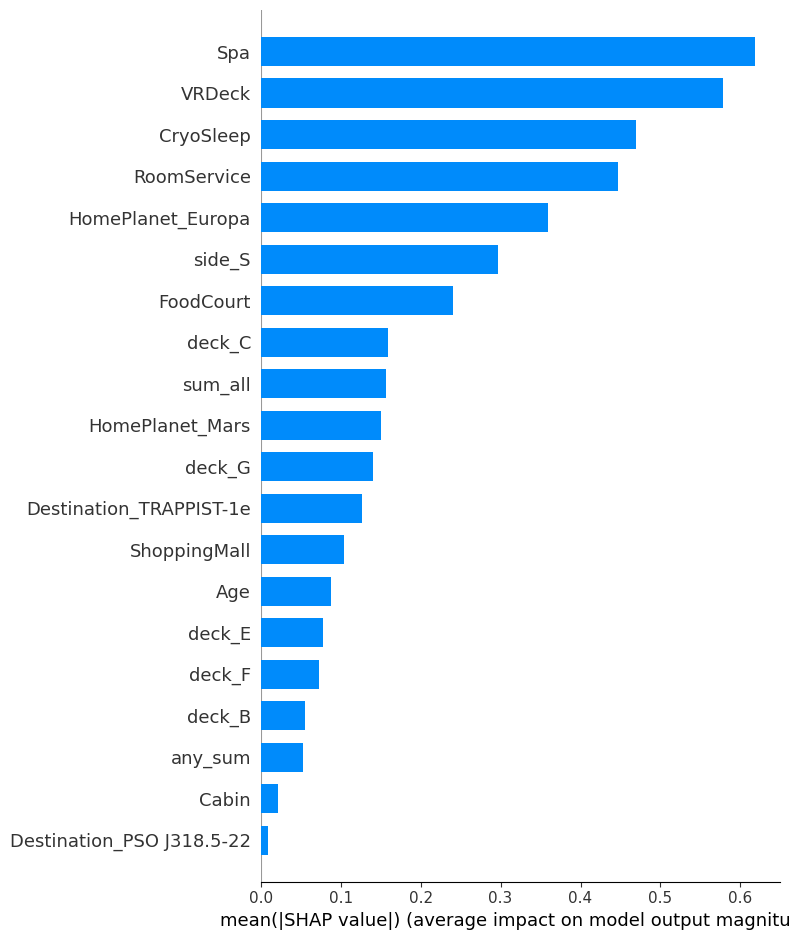

In [31]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df)
shap.summary_plot(shap_values, df, plot_type="bar")

In [32]:
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

feature_importance = pd.DataFrame({
    'Feature': df.columns,
    'Mean Abs SHAP Value': mean_abs_shap_values
})

feature_importance = feature_importance.sort_values(by='Mean Abs SHAP Value', ascending=False)

feature_importance

,Feature,Mean Abs SHAP Value
7,Spa,0.618578
8,VRDeck,0.578060
0,CryoSleep,0.469516
4,RoomService,0.447426
11,HomePlanet_Europa,0.359178
25,side_S,0.297111
5,FoodCourt,0.240134
18,deck_C,0.159135
9,sum_all,0.157166
12,HomePlanet_Mars,0.150457


### learning 2

In [33]:
X_train, X_valid, y_train_sec, y_valid = train_test_split(df, y_train, train_size=0.9, stratify=y_train)

In [34]:
# study = optuna.create_study(study_name="space_titanic", direction="minimize")

# def objective(trial):
#   iterations = trial.suggest_int('iterations', 8000, 10000, step=50)
#   learning_rate = trial.suggest_float('learning_rate', 0.009, 0.015, log=True)

#   model = CatBoostClassifier(iterations=iterations,
#                              learning_rate=learning_rate,
#                              loss_function='Logloss',
#                              cat_features= [],
#                              verbose=True)

#   model.fit(X_train, y_train_sec)

#   y_pred = model.predict(X_valid)
#   ll = log_loss(y_valid, y_pred)

#   return ll

In [35]:
# study.optimize(objective, n_trials=100)

In [40]:
model2 = CatBoostClassifier(
    iterations=8000,
    learning_rate=0.009293152541632457,
    loss_function='Logloss',
    cat_features= [],
    verbose=True
  )

model2.fit(df, y_train)
y_pred2 = model2.predict(df)

Выходные данные были обрезаны до нескольких последних строк (5000).
3000:	learn: 0.2964921	total: 17.2s	remaining: 28.6s
3001:	learn: 0.2964548	total: 17.2s	remaining: 28.6s
3002:	learn: 0.2964419	total: 17.2s	remaining: 28.6s
3003:	learn: 0.2964324	total: 17.2s	remaining: 28.6s
3004:	learn: 0.2963917	total: 17.2s	remaining: 28.6s
3005:	learn: 0.2963640	total: 17.2s	remaining: 28.6s
3006:	learn: 0.2963536	total: 17.2s	remaining: 28.6s
3007:	learn: 0.2963309	total: 17.2s	remaining: 28.6s
3008:	learn: 0.2963136	total: 17.2s	remaining: 28.6s
3009:	learn: 0.2962860	total: 17.2s	remaining: 28.6s
3010:	learn: 0.2962570	total: 17.3s	remaining: 28.6s
3011:	learn: 0.2962422	total: 17.3s	remaining: 28.6s
3012:	learn: 0.2962290	total: 17.3s	remaining: 28.6s
3013:	learn: 0.2961999	total: 17.3s	remaining: 28.6s
3014:	learn: 0.2961869	total: 17.3s	remaining: 28.6s
3015:	learn: 0.2961521	total: 17.3s	remaining: 28.6s
3016:	learn: 0.2961303	total: 17.3s	remaining: 28.6s
3017:	learn: 0.2961152	total: 1

In [41]:
mse = accuracy_score(y_train, y_pred2)
print("accuracy on train set:", mse)

accuracy on train set: 0.922121246980329


In [42]:
pred_res = model2.predict(X_test)

In [43]:
pred_res

array([ True, False,  True, ...,  True,  True,  True])

In [44]:
res = pd.concat([ids, pd.DataFrame(pred_res, columns=['Transported'])], axis=1)

In [45]:
res.to_csv('res.csv', index=False)